# 2D Poisson

In [9]:
from sympy.core.containers import Tuple
from scipy.linalg import eig as eig_solver
import matplotlib.pyplot as plt
from IPython.display import Math

from sympde.core     import Constant
from sympde.calculus import grad, dot
from sympde.topology import ScalarFunctionSpace
from sympde.topology import Square
from sympde.topology import element_of
from sympde.expr     import BilinearForm
from sympde.expr     import integral
from gelato          import GltExpr
from psydac.api.discretization import discretize

In [13]:
# abstract model
domain = Square()

V = ScalarFunctionSpace('V', domain)

u = element_of(V, name='u')
v = element_of(V, name='v')

k_para = Constant('k_para', real=True)
k_perp = Constant('k_perp', real=True)

bx = Constant('b_x', real=True)
by = Constant('b_y', real=True)
b = Tuple(bx, by)

expr = k_para * dot(b, grad(v)) * dot(b, grad(u)) + k_perp * dot(grad(v), grad(u))
a = BilinearForm((v,u), integral(domain, expr))

glt_a = GltExpr(a)

In [14]:
ncells = [16,16]
degrees = [3,3]

In [15]:
# create the computational domain from a topological domain
domain_h = discretize(domain, ncells=ncells)

# discrete spaces
Vh = discretize(V, domain_h, degree=degrees)

# dsicretize the equation using Dirichlet bc
ah = discretize(a, domain_h, [Vh, Vh])

# dsicretize the glt symbol
glt_ah = discretize(glt_a, domain_h, [Vh, Vh])

In [20]:
# ...
eigh = glt_ah.eig(k_perp=1., k_para=1.e4, b_x=1., b_y=1.)
eigh = eigh.ravel()
eigh.sort()
# ...

In [21]:
#  use eigenvalue solver
M = ah.assemble(k_perp=1., k_para=1.e4, b_x=1., b_y=1.).tosparse().todense()
w, v = eig_solver(M)
eig = w.real
eig.sort()

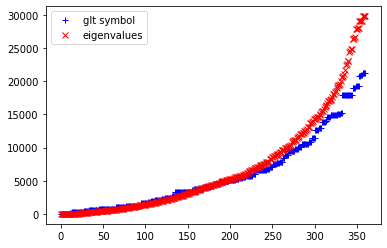

In [22]:
plt.plot(eigh, "+b", label="glt symbol")
plt.plot(eig, "xr", label="eigenvalues")
plt.legend(loc=2);